This program allows you to experiment with diversity measures.  Diversity is a measure of how a set of things are apportioned over a set of categories. Each function defined below takes a dictionary where the keys are lowercase letters and the values are integrers. The Rao-Stirling distance measure is equal to the distance between letters, so a-b is 1/26, and a-z is 1.  'True' Rao-Stirling uses a distance matrix between each pair of categories, but this one-dimensional example is easier to explain.

Measures from Stirling. 2007. _A general framework for analysing diversity in science, technology and society_. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2373389/
DivC is a new measure from Leydesdorff et al. 2018. _Interdisciplinarity as Diversity in Citation Patterns among Journals: Rao-Stirling Diversity, Relative Variety, and the Gini coefficient_. https://arxiv.org/abs/1807.04115

In [43]:
import math
import string
import pandas as pd

i = 0
distance_measure= {}
while i < len(string.ascii_lowercase):
    i =i + 1
    distance_measure[string.ascii_lowercase[i-1]]=i


def distance(a,b) :
    return math.fabs(distance_measure[a]-distance_measure[b])/26

In [23]:
#Diversity functions
#All calculates all four functions and displays the results of each to 7 digits

def PropCount(sample):
    return len(sample)/26

def Gini(sample):
    total = 0
    for sc in sample :
        total = total + sample[sc]
    gini = 1
    for sc in sample:
        gini = gini - (sample[sc] / total) * (sample[sc] / total)
    return gini

def ShannonH (sample):
    total = 0
    for sc in sample :
        total = total + sample[sc]
    ShannonH = 0
    for sc in sample :
        ShannonH = ShannonH - (sample[sc]/total)*math.log(sample[sc]/total)
    return ShannonH

def RaoStirling(sample):
    samplelist=list(sample)
    total = 0
    for sc in sample :
        total = total + sample[sc]
    SDI = 0
    i = 0
    j = 1
    while i < len(samplelist) :
        j = i + 1
        while j < len(samplelist) :
            WCi = samplelist[i]
            WCj = samplelist[j]
            invdistance = distance(WCi, WCj)
            SDI = SDI + invdistance*(sample[WCi]/total)*(sample[WCj]/total)
            j =j +1
        i =i + 1
    return SDI
        
def DivC(sample):
    samplelist=list(sample)
    total = 0
    for sc in sample :
        total = total + sample[sc]
    DivC = 0
    i = 0
    j = 1
    while i < len(samplelist) :
        j = i + 1
        while j < len(samplelist) :
            WCi = samplelist[i]
            WCj = samplelist[j]
            invdistance = distance(WCi, WCj)
            DivC = DivC + invdistance/(len(samplelist)*(len(samplelist)-1))
            j =j +1
        i =i + 1
    gini = 1
    for sc in sample:
        gini = gini - (sample[sc] / total) * (sample[sc] / total)
    DivC = len(samplelist)/26*gini*DivC
    return DivC

def All(sample):
    gini = Gini(sample)
    SH = ShannonH(sample)
    SDI = RaoStirling(sample)
    divc = DivC(sample)
    return [round(gini,7), round(SH,7), round(SDI,7), round(divc,7)]

In [24]:
#example dictionaries to use

one = {'a':5,'b':5}
two = {'a':5,'z':5}
three = {'a':1,'b':1,'c':1,'d':1,'e':1,'f':1,'g':1,'h':1,'i':1,'j':1,'a':1}
interdisciplinary = {'e':5,'g':2,'f':2,'a':1}
monodisciplinary = {'e':9,'d':1,'f':1}
dualdisciplinary = {'d':4,'h':4, 'g':1,'m':1}
examplea = {'a':100,'b':1}
exampleb = {'d':56,'h':10, 'g':3,'m':1}
examplec = {'k':20,'t':12,'n':20, 'l':7,'m':3, 'c':1, 'p':1,'q':1,'e':5}

In [22]:
print(one, '\n', All(one),'\n')
print(three, '\n', All(three))

{'a': 5, 'b': 5} 
 [0.5, 0.6931472, 0.0096154, 0.0007396] 

{'a': 1, 'b': 1, 'c': 1, 'd': 1, 'e': 1, 'f': 1, 'g': 1, 'h': 1, 'i': 1, 'j': 1} 
 [0.9, 2.3025851, 0.0634615, 0.0244083]


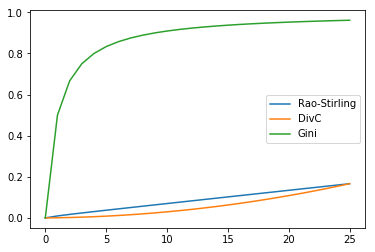

In [44]:
#how Gini, Rao-Stirling and DivC change as we add categories, one at a time.

raostirlings = []
divcs = []
ginis = []
alphabet = {}

for letter in string.ascii_lowercase:
    alphabet[letter]=1
    raostirlings.append(RaoStirling(alphabet))
    divcs.append(DivC(alphabet))
    ginis.append(Gini(alphabet))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(raostirlings, label='Rao-Stirling')
plt.plot(divcs, label='DivC')
plt.plot(ginis, label = 'Gini')
plt.legend()
plt.show()

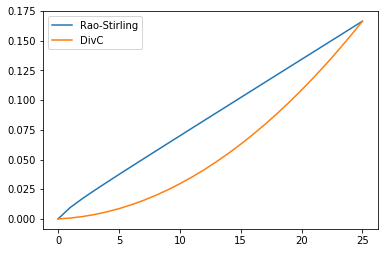

In [45]:
plt.plot(raostirlings, label='Rao-Stirling')
plt.plot(divcs, label='DivC')
plt.legend()
plt.show()